## 🌾 Dataset Overview

**Dataset source:** [Kaggle - Crop Yield Prediction Dataset](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset/data?select=yield_df.csv)

This dataset provides insights into various aspects of agriculture 🌱, specifically focusing on farm-level details, crop types, irrigation methods, soil properties, and associated metrics such as yield, water usage, average temperature, time of farming practices, crop type, average rainfall, and pesticide usage. The goal is to analyze and predict crop yields and identify factors that influence productivity.

### 🔑 Key Features:

* **🏷️ ID**: Unique identifier for each farm.
* **🌽 Item**: Type of crop cultivated (e.g., Cotton, Carrot, Wheat).
* **🌍 Average\_Rainfall (mm/year)**: 🌧️ The rainfall level of the environment when these crops were propagated.
* **🌍 Average\_Temperature**: The average temperature of the environment when these crops were propagated.
* **🗓️ Year**: The year in which the crops were grown (e.g., 1990, 1995, 1998).
* **🏞️ Area (Location)**: Area in which these crops were propagated.
* **🐞 Pesticide\_Used (tons)**: Amount of pesticide used.
* **📈 Yield (hg/ha)**: Total yield of the crop in hg/ha.

### 🎯 Objective:

The primary objective is to analyze the relationships between these variables, identify factors that influence crop yields, and build predictive models to estimate yields based on input features.

### 📊 Data Characteristics:

* **📝 Data Type**: The dataset contains both numerical and categorical features.
* **🎯 Target Variable**: `Yield(tons)`
* **🔢 Encoded Features**: Categorical variables such as `Area` and `Item` are encoded for modeling purposes.

### 🤖 Modeling Approach:

* **Regression Models Used**:

  * 🧮 Linear Regression
  * 🌲 Random Forest Regressor
* **🏆 Best Model**: The Random Forest Regressor provided the best performance based on the evaluation metrics (Root Mean Squared Error, Mean Absolute Error, and R-squared).



<h1 style="color: transparent;">1. Imports and Setup</h1>
<div style="border-radius: 20px; border: 2px solid #FFD700; padding: 14px; background-color: #1E1E2F; text-align: center; box-shadow: 0 4px 10px rgba(255, 215, 0, 0.2);">
    <h1 style="color: #FFD700; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.6); font-weight: bold; margin-bottom: 8px; font-size: 26px;">
        1. Imports and Setup
    </h1>
</div>

In [21]:
### Import tools and framework

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error, r2_score
import joblib

In [2]:
# Define RMSE function
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

<h1 style="color: transparent;">2. Load and Explore Dataset</h1>

<div style="border-radius: 20px; border: 2px solid #FFD700; padding: 14px; background-color: #1E1E2F; text-align: center; box-shadow: 0 4px 10px rgba(255, 215, 0, 0.2);">
    <h1 style="color: #FFD700; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.6); font-weight: bold; margin-bottom: 8px; font-size: 26px;">
        2. Load and Explore Dataset
    </h1>
</div>


In [ ]:
df = pd.read_csv("crop_yield/yield_df.csv")
# Load the datasetdf.head()

In [16]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe())

Shape of the dataset: (28242, 8)


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB
None

Statistical Summary:


,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


### A Summary of the Dataset:

* **Shape of the dataset**: (28,242 rows, 8 columns)

* **Column Information**:

  * **ID**: Unique identifier for each farm (`int64`)
  * **Item**: Type of crop cultivated (e.g., Cotton, Carrot, Wheat) (`object`)
  * **Average\_Rainfall (mm/year)**: 🌧️ The rainfall level of the environment when these crops were propagated (`float64`)
  * **Average\_Temperature**: The average temperature of the environment when these crops were propagated (`float64`)
  * **Year**: The year in which the crops were grown (e.g., 1990, 1995, 1998) (`int64`)
  * **Area (Location)**: The area in which these crops were propagated (`object`)
  * **Pesticide\_Used (tons)**: Amount of pesticide used (`float64`)
  * **Yield (hg/ha)**: Total yield of the crop in hectograms per hectare (`int64`)

* **Statistical Summary**:

  * The average year is approximately **2001.54**, with a standard deviation of **7.05**.
  * Rainfall and temperature vary, with average values of **1,149.06 mm/year** and **20.54 °C**, respectively.
  * The average crop yield is about **77,053.33 hg/ha**.

In [5]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


<h1 style="color: transparent;">3. Unique Value Exploration</h1>

<div style="border-radius: 20px; border: 2px solid #FFD700; padding: 14px; background-color: #1E1E2F; text-align: center; box-shadow: 0 4px 10px rgba(255, 215, 0, 0.2);">
    <h1 style="color: #FFD700; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.6); font-weight: bold; margin-bottom: 8px; font-size: 26px;">
        3. Unique Value Exploration
    </h1>
</div>


In [6]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
Unnamed: 0                       28242
Area                               101
Item                                10
Year                                23
hg/ha_yield                      11514
average_rain_fall_mm_per_year      100
pesticides_tonnes                 1673
avg_temp                          1831
dtype: int64


In [7]:
#Checking for uniquness of countries

print("The countries contained in the dataset are:", df["Area"].unique()) #how many countries

The countries contained in the dataset are: ['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Canada' 'Central African Republic' 'Chile' 'Colombia' 'Croatia'
 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Eritrea'
 'Estonia' 'Finland' 'France' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'India' 'Indonesia' 'Iraq'
 'Ireland' 'Italy' 'Jamaica' 'Japan' 'Kazakhstan' 'Kenya' 'Latvia'
 'Lebanon' 'Lesotho' 'Libya' 'Lithuania' 'Madagascar' 'Malawi' 'Malaysia'
 'Mali' 'Mauritania' 'Mauritius' 'Mexico' 'Montenegro' 'Morocco'
 'Mozambique' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Norway' 'Pakistan' 'Papua New Guinea' 'Peru' 'Poland' 'Portugal'
 'Qatar' 'Romania' 'Rwanda' 'Saudi Arabia' 'Senegal' 'Slovenia'
 'South Africa' 'Spain' 'Sri Lanka' 'Sudan' 'S

In [8]:
#Checking for uniquness of crops

print("The crops contained in the dataset are:", df["Item"].unique()) #how many crops

The crops contained in the dataset are: ['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']


<h1 style="color: transparent;">4. Exploratory Data Analysis (EDA)</h1>

<div style="border-radius: 20px; border: 2px solid #FFD700; padding: 14px; background-color: #1E1E2F; text-align: center; box-shadow: 0 4px 10px rgba(255, 215, 0, 0.2);">
    <h1 style="color: #FFD700; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.6); font-weight: bold; margin-bottom: 8px; font-size: 26px;">
        4. Exploratory Data Analysis (EDA)
    </h1>
</div>


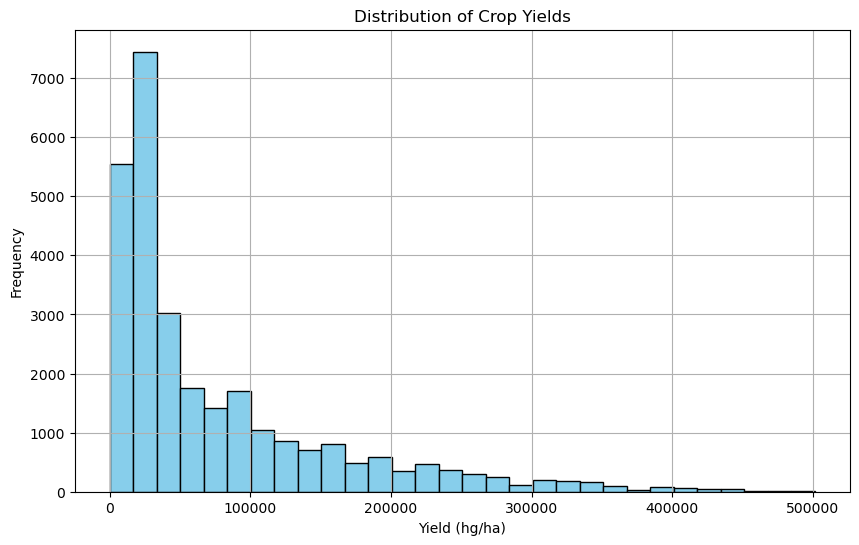

In [9]:

#DISTRIBUTION OF CROP YIELDS

plt.figure(figsize=(10, 6))
plt.hist(df["hg/ha_yield"], bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Yield (hg/ha)")
plt.ylabel("Frequency")
plt.title("Distribution of Crop Yields")
plt.grid(True)


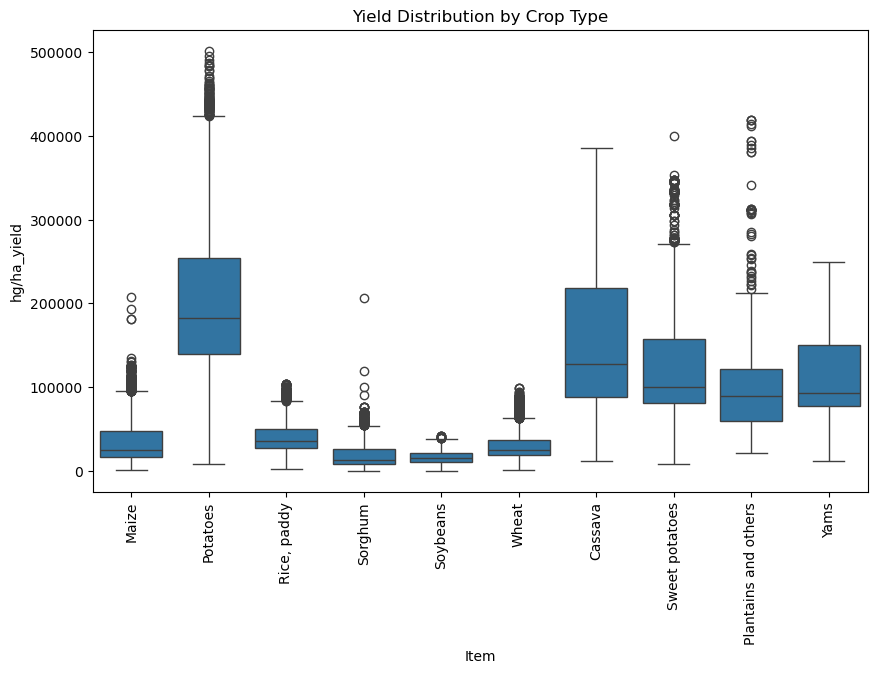

In [10]:

#YIELDS PER CROP TYPE

plt.figure(figsize=(10, 6))
sns.boxplot (x = "Item", y = "hg/ha_yield", data = df, )
plt.xticks(rotation = 90)
plt.title("Yield Distribution by Crop Type")
plt.show()

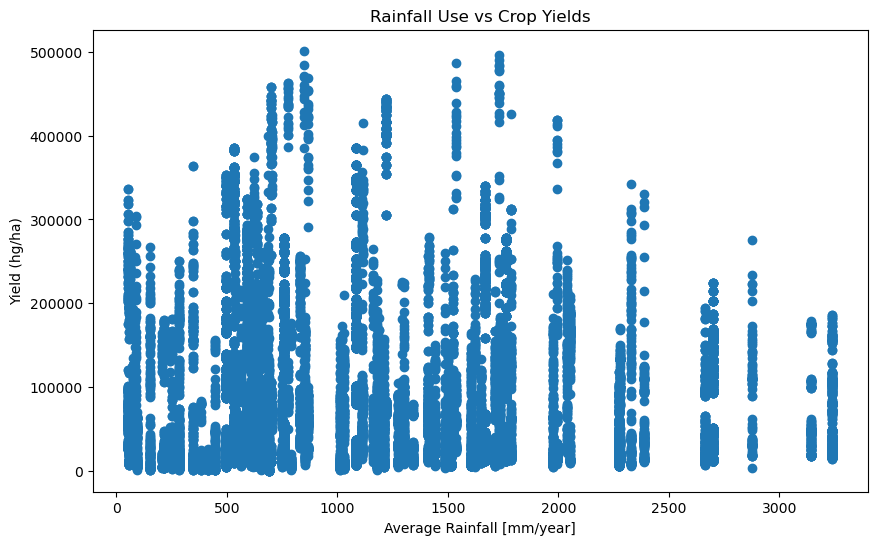

In [11]:
#RAINFALL VS YIELD

plt.figure(figsize=(10, 6))
plt.scatter(df["average_rain_fall_mm_per_year"], df["hg/ha_yield"], )
plt.xlabel("Average Rainfall [mm/year]")
plt.ylabel("Yield (hg/ha)")
plt.title("Rainfall Use vs Crop Yields")
plt.show()

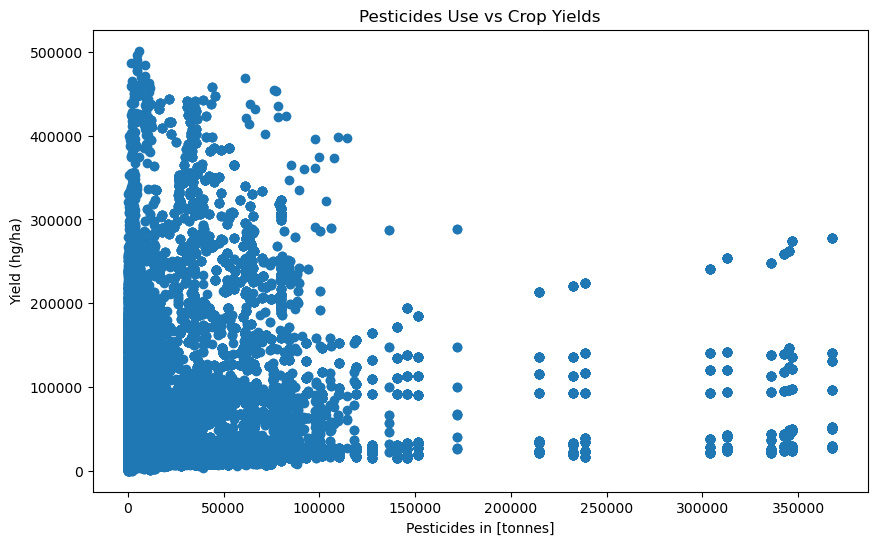

In [12]:
#PESTICIDES VS YIELD

plt.figure(figsize=(10, 6))
plt.scatter(df["pesticides_tonnes"], df["hg/ha_yield"], )
plt.xlabel("Pesticides in [tonnes]")
plt.ylabel("Yield (hg/ha)")
plt.title("Pesticides Use vs Crop Yields")
plt.show()

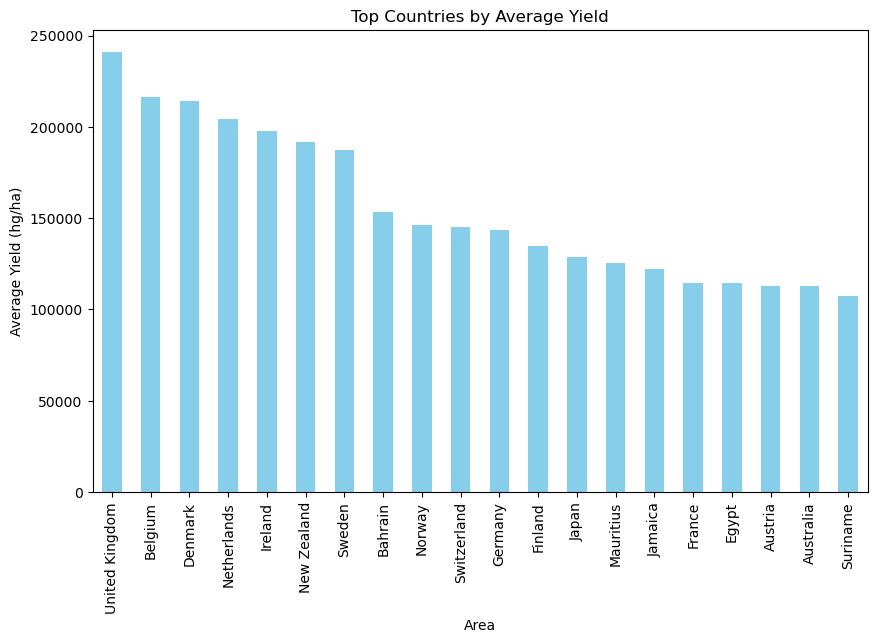

In [13]:
#AVERAGE YIELD BY COUNTRY


df.groupby("Area")["hg/ha_yield"].mean().sort_values(ascending = False).head(20).plot(
    kind = "bar",
    figsize=(10, 6),
    color="skyblue"

)

plt.ylabel("Average Yield (hg/ha)")
plt.title("Top Countries by Average Yield")
plt.show()


## 📊 Insights Based on the Summary of Chart Metrics

### 🌾 Yield Insights:

* **Distribution of Crop Yields**:
  The chart shows the frequency of crop yields. It suggests a linear trend where **lower yields occur more frequently**, and **higher yields occur less frequently**.

* **Yields per Crop Type**:
  **Maize** is the highest-yielding crop, producing over **450,000 hg/ha**.

* **Rainfall vs Yield**:
  The rainfall chart appears **skewed**, indicating how variations in rainfall levels affect crop yield.

* **Pesticides vs Yield**:
  The use of pesticides influences crop yield. The chart shows that **higher pesticide usage is associated with lower yields**.

* **Average Yield by Country**:
  Countries such as the **United Kingdom, Belgium, Denmark, Netherlands, Sweden, Bahrain, and Norway** are among the top performers in crop yield.
  This may be due to:

  * The availability of **high-tech agricultural standards**
  * Access to **sophisticated machinery, equipment, and facilities**


<h1 style="color: transparent;">5. Data Preprocessing</h1>

<div style="border-radius: 20px; border: 2px solid #FFD700; padding: 14px; background-color: #1E1E2F; text-align: center; box-shadow: 0 4px 10px rgba(255, 215, 0, 0.2);">
    <h1 style="color: #FFD700; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.6); font-weight: bold; margin-bottom: 8px; font-size: 26px;">
        5. Data Preprocessing
    </h1>
</div>


In [14]:
# Select features and target
X = df[["Area", "Item", "pesticides_tonnes", "avg_temp", "average_rain_fall_mm_per_year"]]
y = df["hg/ha_yield"]



# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

In [22]:
#Encoding 

# Select only the categorical columns
categorical_cols = ["Area", "Item"]
numerical_cols = ["pesticides_tonnes", "avg_temp", "average_rain_fall_mm_per_year"]

# Initialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on training data ONLY
ohe.fit(X_train[categorical_cols])

# Transform both train and test data
X_train_cat = ohe.transform(X_train[categorical_cols])
X_test_cat = ohe.transform(X_test[categorical_cols])

# Get back DataFrames with correct column names
ohe_columns = ohe.get_feature_names_out(categorical_cols)
X_train_cat_df = pd.DataFrame(X_train_cat, columns=ohe_columns, index=X_train.index)
X_test_cat_df = pd.DataFrame(X_test_cat, columns=ohe_columns, index=X_test.index)

# Combine categorical and numerical
X_train_final = pd.concat([X_train_cat_df, X_train[numerical_cols]], axis=1)
X_test_final = pd.concat([X_test_cat_df, X_test[numerical_cols]], axis=1)


In [23]:
print(X_train.dtypes)

Area                              object
Item                              object
pesticides_tonnes                float64
avg_temp                         float64
average_rain_fall_mm_per_year    float64
dtype: object



<h1 style="color: transparent;">5. Data Preprocessing</h1>

<div style="border-radius: 20px; border: 2px solid #FFD700; padding: 14px; background-color: #1E1E2F; text-align: center; box-shadow: 0 4px 10px rgba(255, 215, 0, 0.2);">
    <h1 style="color: #FFD700; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.6); font-weight: bold; margin-bottom: 8px; font-size: 26px;">
       6. Model Training and Evaluation
    </h1>
</div>


In [24]:
#Training with LinearReLinearRegression model


# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_final, y_train)
linear_preds = linear_model.predict(X_test_final)

print("Linear Regression Results:")
print(" RMSE:", root_mean_squared_error(y_test, linear_preds))
print(" MAE:", mean_absolute_error(y_test, linear_preds))
print(" R^2 Score:", r2_score(y_test, linear_preds))


Linear Regression Results:
 RMSE: 42644.14549467154
 MAE: 29811.75168804305
 R^2 Score: 0.7492961975293482


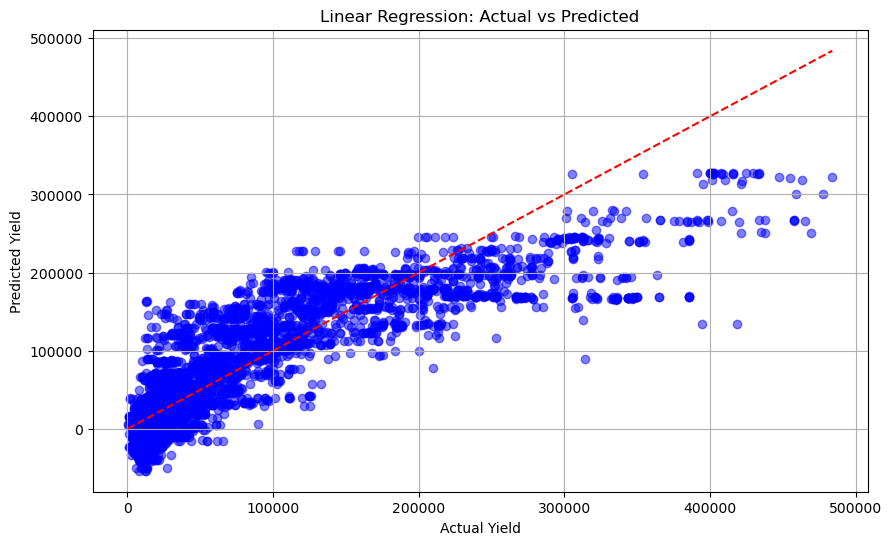

In [25]:
#PLotting the graph of LinearReLinearRegression Model 


plt.figure(figsize = (10, 6))
plt.scatter(y_test, linear_preds, alpha=0.5, color="blue" )
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], "r--", )

plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)


In [26]:
#Training with RandomForestRegressor model


# Random Forest
random_model = RandomForestRegressor(random_state=42)
random_model.fit(X_train_final, y_train)
random_preds = random_model.predict(X_test_final)

print("\nRandom Forest Regression Results:")
print(" RMSE:", root_mean_squared_error(y_test, random_preds))
print(" MAE:", mean_absolute_error(y_test, random_preds))
print(" R^2 Score:", r2_score(y_test, random_preds))


Random Forest Regression Results:
 RMSE: 13780.883311126017
 MAE: 5532.651167434403
 R^2 Score: 0.9738183990677184


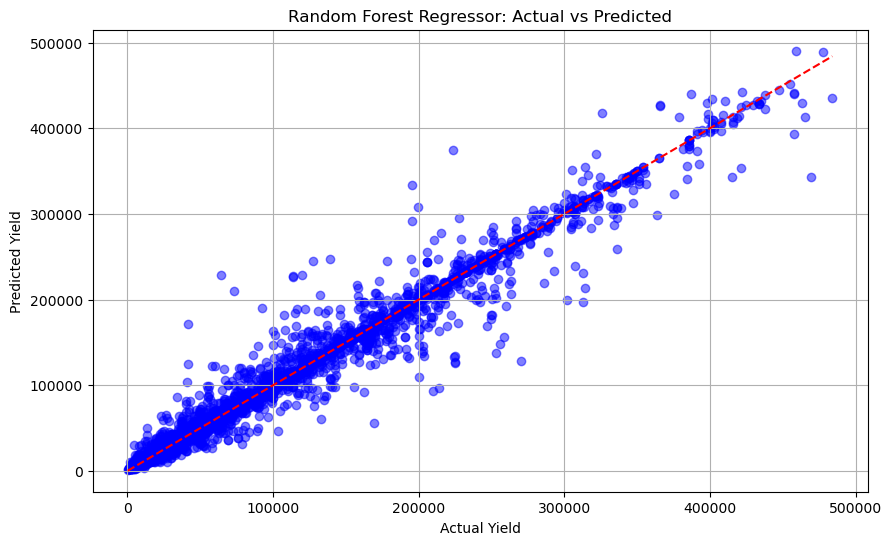

In [27]:
#PLotting the graph of RandomForestRegressor Model 

plt.figure(figsize = (10, 6))
plt.scatter(y_test, random_preds, alpha=0.5, color="blue" )
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], "r--"  )

plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.grid(True)


In [29]:
# Save the trained model
joblib.dump(random_model, "crop_yield_model.pkl")

# Save the fitted OneHotEncoder
joblib.dump(ohe, "ohe_encoder.pkl")

['ohe_encoder.pkl']


<h1 style="color: transparent;">5. Data Preprocessing</h1>

<div style="border-radius: 20px; border: 2px solid #FFD700; padding: 14px; background-color: #1E1E2F; text-align: center; box-shadow: 0 4px 10px rgba(255, 215, 0, 0.2);">
    <h1 style="color: #FFD700; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.6); font-weight: bold; margin-bottom: 8px; font-size: 26px;">
       <a href ="http://github.com/SamuelComputer">See link below for the complete django project</a>
    </h1>
</div>



<h1 style="color: transparent;">5. Data Preprocessing</h1>

<div style="border-radius: 20px; border: 2px solid #FFD700; padding: 14px; background-color: #1E1E2F; text-align: center; box-shadow: 0 4px 10px rgba(255, 215, 0, 0.2);">
    <h1 style="color: #FFD700; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.6); font-weight: bold; margin-bottom: 8px; font-size: 26px;">
       <a href ="http://github.com/SamuelComputer">Follow me on Github</a>
    </h1>
</div>
